# PR曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 把数据变为极度偏斜的数据
# 把手写数字分为9和非9两大类， 重点关注的是分类为9的数字
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection._split import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model.logistic import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

In [5]:
decision_scores = log_reg.decision_function(X_test)
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
# thresholds中每一个值都是一个阈值，然后绘制那个阈值下，对应的精准率，召回率

### 绘制每个threshold值下，对应的精准率，召回率

In [6]:
from sklearn.metrics.scorer import precision_score, recall_score
precisions = []
recalls = []

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype=int)
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

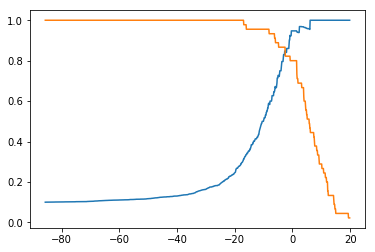

In [8]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

### Precision-Recall 曲线

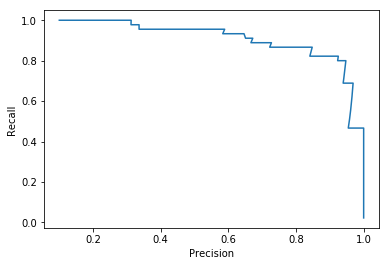

In [9]:
plt.plot(precisions, recalls)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

### sklearn中的Precision-Recall曲线

In [10]:
from sklearn.metrics.ranking import precision_recall_curve

precisions, recalls, thresholds =precision_recall_curve(y_test, decision_scores)

In [11]:
# scikit-learn会自动取它认为适合的步长
precisions.shape

(145,)

In [12]:
# scikit-learn会自动取它认为适合的步长
recalls.shape

(145,)

In [13]:
# 注意thresholds会比precisions和recalls少一条记录（最后那条记录）
thresholds.shape

(144,)

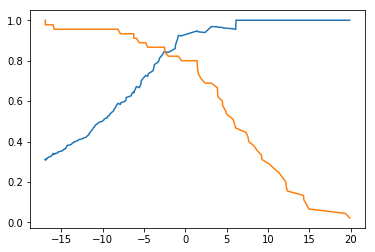

In [14]:
# scikit-learn中没有从最小的threshold值开始取，它会从它认为合适的位置开始
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

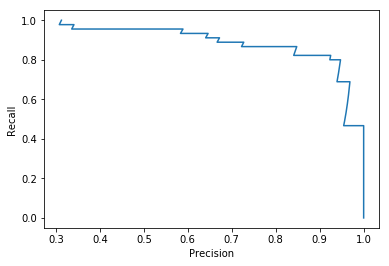

In [15]:
# PR曲线
plt.plot(precisions, recalls)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()